# Project: TMDb movie data analysis
## Table of Contents
- Introduction
- Data Wrangling
- Exploratory Data Analysis
- Conclusions

## Introduction

To complete my Data Analysis project I am using TMDb movies dataset.


This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

- Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
- There are some odd characters in the ‘cast’ column.
- The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

### From this dataset we could try to solve many different questions such as :

- Is there an improvement in the quality of movies from year to year?

- What kinds of properties are associated with movies that have high revenues?

- Is the number of movies increase from year to year?

- Is there a relation between a movie runtime and the vote average?

- Who are the top 5 directors according to high revenues?

- longest and shortest runtime values?

- What is the most number of films for every genres all over the time?

- largest and lowest budgets?

- most and least earned revenu?

- Who are the actors that have participated in more movies?

- Average runtime?

In [171]:
#importing important libraries 

import pandas as pd
import numpy as np
import csv
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

pd.set_option("display.max_columns",None)

UsageError: Line magic function `%` not found.


## Data Wrangling

- load the data

- check the data shape (10866 rows and 21 columns)

- check the presence of null values ( Missing Values )

- check the presence of duplications

- check the presence of outliers

In [172]:
#loading data from 'tmdb-movies.csv' file:

df = pd.read_csv('tmdb-movies.csv')

In [173]:
#Check the shape of our data (rows , columns)

df.shape

(10866, 21)

In [174]:
# the data info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [175]:
#Check how many NaN values in our data

df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [176]:
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [177]:
#Check how many duplicated rows in our data

df.duplicated().sum()

1

## Data Cleaning
- Drop the unneeded columns

    We don't need it in our analysis or it has a many null values

- Drop the duplicates

- Drop any row with NaN values ( Missing Values)

    After the previous two steps I have checked the presence of NaN values and decided to drop them since that only two columns ( director , genres ) have NaN values --> In the worst case 44 + 23 = 67 rows ( Small number if compared with the shape of the whole data ) and the data in these two columns are names and categories ( Categorical Data ) so I can't replace these NaN values with an appropriate value


- Dealing with the numeric outliers in these four columns ( budget , revenue , budget_adj , revenue_adj )

    Since that 50% of the data in these four columns are zeroes, So I decided to replace all these zeroes with the Average of each column instead of droping the rows with zeroes in these columns

In [178]:
#change release_date to data time and get some info from it like a day name and month of release

df = pd.read_csv('tmdb-movies.csv')
df['release_date']= pd.to_datetime(df['release_date'])
df['month'] = df['release_date'].apply(lambda time:time.month)
df['day name'] = df['release_date'].dt.day_name()

#State the name of columns which we need to remove from our data

dropped_cols = ['id','imdb_id','cast','homepage','tagline','keywords','overview','production_companies','release_date']

#Drop the columns stated in the dropped_cols list

df.drop(dropped_cols,axis=1,inplace=True)

#Drop the duplicated rows

df.drop_duplicates(inplace=True)

#Drop the rows that have NaN values 

df.dropna(inplace=True)

#Check how many NaN values in the data after the previous cleaning

df.isnull().sum()

popularity        0
budget            0
revenue           0
original_title    0
director          0
runtime           0
genres            0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
month             0
day name          0
dtype: int64

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10800 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10800 non-null  float64
 1   budget          10800 non-null  int64  
 2   revenue         10800 non-null  int64  
 3   original_title  10800 non-null  object 
 4   director        10800 non-null  object 
 5   runtime         10800 non-null  int64  
 6   genres          10800 non-null  object 
 7   vote_count      10800 non-null  int64  
 8   vote_average    10800 non-null  float64
 9   release_year    10800 non-null  int64  
 10  budget_adj      10800 non-null  float64
 11  revenue_adj     10800 non-null  float64
 12  month           10800 non-null  int64  
 13  day name        10800 non-null  object 
dtypes: float64(4), int64(6), object(4)
memory usage: 1.2+ MB


In [180]:
#Check how many NaN values in the data after the previous cleaning

df.isnull().sum()

popularity        0
budget            0
revenue           0
original_title    0
director          0
runtime           0
genres            0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
month             0
day name          0
dtype: int64

In [181]:
#Check the shape of our data (rows , columns)

df.shape

(10800, 14)

In [182]:
#print out the first  rows of our data

df.head()

,popularity,budget,revenue,original_title,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,month,day name
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09,6,Tuesday
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08,5,Wednesday
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08,3,Wednesday
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09,12,Tuesday
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09,4,Wednesday


In [183]:
#replacing 0 with NaN of budget_adj column in the dataset
df['budget_adj_null'] =df['budget_adj'].replace(0, np.NAN)

#replacing 0 with NaN of revenue column in the dataset
df['revenue_null'] =df['revenue'].replace(0, np.NAN)

#replacing 0 with NaN of revenue_adj column in the dataset
df['revenue_adj_null'] =df['revenue_adj'].replace(0, np.NAN)

#replacing 0 with NaN of release_year column in the dataset
df['budget_null'] =df['budget'].replace(0, np.NAN)

In [184]:
#Check how many NaN values in the data after the previous cleaning

df.isnull().sum()

popularity             0
budget                 0
revenue                0
original_title         0
director               0
runtime                0
genres                 0
vote_count             0
vote_average           0
release_year           0
budget_adj             0
revenue_adj            0
month                  0
day name               0
budget_adj_null     5636
revenue_null        5952
revenue_adj_null    5952
budget_null         5636
dtype: int64

In [185]:
unique=df["release_year"].unique()

#get the mean budget for every year
means_budget={}
for year in unique:
    means_budget[year]=df[df["release_year"]==year]['budget'].mean()
    
#get the mean revenue for every year
means_revenue={}
for year in unique:
    means_revenue[year]=df[df["release_year"]==year]['revenue'].mean()
    
    
#get the mean budget_adj for every year
means_budget_adj={}
for year in unique:
    means_budget_adj[year]=df[df["release_year"]==year]['budget_adj'].mean()
    
    
#get the mean revenue_adj for every year
means_revenue_adj={}
for year in unique:
    means_revenue_adj[year]=df[df["release_year"]==year]["revenue_adj"].mean()
    
#means_year

In [186]:
#This function takes the column name and the the value to be replaced and replace it with the mean of the value of 
#this column in the maen value of the year

def get_mean(kind,year,rep,means):
    df[kind].replace(rep,means[year],inplace=True)

In [187]:
#Apply the function on the following columns ['revenue_adj','budget_adj','revenue','budget']

df.apply(lambda row:get_mean('budget',row.release_year,0,means_budget),axis = 1)           
df.apply(lambda row:get_mean('revenue',row.release_year,0,means_revenue),axis = 1)           
df.apply(lambda row:get_mean('budget_adj',row.release_year,0,means_budget_adj),axis = 1)           
df.apply(lambda row:get_mean('revenue_adj',row.release_year,0,means_revenue_adj),axis = 1) 
print("Done")

Done


In [188]:
#replacing 0 with NaN of budget_adj column in the dataset
df['budget_adj_null'] =df['budget_adj'].replace(0, np.NAN)

#replacing 0 with NaN of revenue column in the dataset
df['revenue_null'] =df['revenue'].replace(0, np.NAN)

#replacing 0 with NaN of revenue_adj column in the dataset
df['revenue_adj_null'] =df['revenue_adj'].replace(0, np.NAN)

#replacing 0 with NaN of release_year column in the dataset
df['budget_null'] =df['budget'].replace(0, np.NAN)

#Check how many NaN values in the data after the previous cleaning

df.isnull().sum()

popularity          0
budget              0
revenue             0
original_title      0
director            0
runtime             0
genres              0
vote_count          0
vote_average        0
release_year        0
budget_adj          0
revenue_adj         0
month               0
day name            0
budget_adj_null     0
revenue_null        0
revenue_adj_null    0
budget_null         0
dtype: int64

In [189]:
dropped_cols = ['budget_adj_null','revenue_null','revenue_adj_null','budget_null']

#Drop the columns stated in the dropped_cols list

df.drop(dropped_cols,axis=1,inplace=True)

In [190]:
df.sample(5)

,popularity,budget,revenue,original_title,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,month,day name
9026,0.737255,1.217395e+07,1.409632e+07,Les MisÃ©rables,Bille August,134,Crime|Drama|History|Romance,79,6.7,1998,1.120003e+07,1.885658e+07,5,Friday
4135,0.177188,1.217395e+07,4.288854e+07,Saathiya,Shaad Ali,137,Drama|Romance|Foreign,11,5.3,2002,1.120003e+07,3.945744e+07,12,Friday
5892,0.248392,1.217395e+07,4.288854e+07,All Hallows' Eve,Damien Leone,82,Horror,29,4.7,2013,1.120003e+07,3.945744e+07,10,Tuesday
4688,0.292449,1.217395e+07,4.288854e+07,Barbie: The Princess & The Popstar,Ezekiel Norton,86,Family|Animation,28,5.8,2012,1.120003e+07,3.945744e+07,9,Thursday
4645,0.344296,1.217395e+07,4.288854e+07,Side by Side,Christopher Kenneally,99,Documentary,63,7.0,2012,1.120003e+07,3.945744e+07,8,Sunday


In [191]:
#replacing 0 with NaN of runtime column in the dataset
df['runtime'] =df['runtime'].replace(0, np.NAN)

## Changing format of budget and revenue column.

    Checking the current format of columns in the dataset

In [192]:
#printing the data type of the data set
df.dtypes

popularity        float64
budget            float64
revenue           float64
original_title     object
director           object
runtime           float64
genres             object
vote_count          int64
vote_average      float64
release_year        int64
budget_adj        float64
revenue_adj       float64
month               int64
day name           object
dtype: object

In [193]:
change_type=['revenue_adj','budget_adj','revenue','budget']
#changing data type
df[change_type]=df[change_type].applymap(np.int64)

In [194]:
#printing the changed information
df.dtypes

popularity        float64
budget              int64
revenue             int64
original_title     object
director           object
runtime           float64
genres             object
vote_count          int64
vote_average      float64
release_year        int64
budget_adj          int64
revenue_adj         int64
month               int64
day name           object
dtype: object

In [195]:
#insert function with three parameters(index of the column in the dataset, name of the column, value to be inserted)
df.insert(3,'profit_earned',df['revenue']-df['budget'])
df.insert(13,'profit_earned_adj',df['revenue_adj']-df['budget_adj'])
df.insert(14,'year',df['release_year'])
df.drop(['release_year'],axis=1,inplace=True)
#previewing the changes in the dataset
df.head(2)

,popularity,budget,revenue,profit_earned,original_title,director,runtime,genres,vote_count,vote_average,budget_adj,revenue_adj,profit_earned_adj,year,month,day name
0,32.985763,150000000,1513528810,1363528810,Jurassic World,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,5562,6.5,137999939,1392445892,1254445953,2015,6,Tuesday
1,28.419936,150000000,378436354,228436354,Mad Max: Fury Road,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,6185,7.1,137999939,348161292,210161353,2015,5,Wednesday


## Exploratory Data Analysis
    I have used the analysis step to answer these questions which I have asked in my own 

## - What is the most number of films for every genres all over the time?

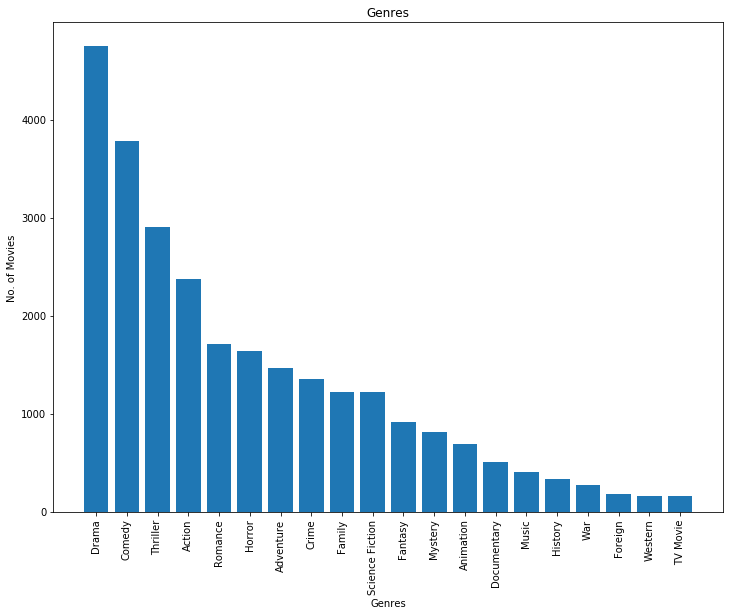

In [196]:
def data(column_lable):
    #will take a column, and separate the string by '|'
    column_separate = df[column_lable].str.cat(sep = '|')
    
    #giving pandas series and storing the values separately
    column_separate = pd.Series(column_separate.split('|'))
    
    #arranging in descending order
    database = column_separate.value_counts(ascending = False)
    
    return database


#variable to store the retured value
database = data('genres')




#Determine the data of the X axis and the data of the X axis

x = database.index
y = database

#Plotting

fig, ax = plt.subplots()

#set the plot and ticks properties
ax.figure.set_size_inches(12, 9)
ax.set_xticklabels(x,rotation=90)
ax.set_title("Genres")
ax.set_xlabel('Genres')
ax.set_ylabel('No. of Movies')

ax.bar(x, y);

### Conclusions
- Drama is the most kind of movies in Database ,the number of Drama movies=4754 
- TV Movie is the less kind of movies in Database ,the number of TV Movie= 162 

## Show an overview about the data

In [197]:
describe=df[['revenue_adj','budget_adj','profit_earned_adj','revenue','budget','profit_earned','vote_count','vote_average','runtime']].describe()
describe

,revenue_adj,budget_adj,profit_earned_adj,revenue,budget,profit_earned,vote_count,vote_average,runtime
count,1.080000e+04,1.080000e+04,1.080000e+04,1.080000e+04,1.080000e+04,1.080000e+04,10800.000000,10800.000000,10772.000000
mean,7.342257e+07,2.349913e+07,4.992344e+07,6.370193e+07,2.106414e+07,4.263779e+07,218.600741,5.970880,102.455347
std,1.384478e+08,3.173601e+07,1.215185e+08,1.110168e+08,2.846448e+07,9.320005e+07,577.165055,0.933006,30.379156
min,2.000000e+00,0.000000e+00,-4.139124e+08,2.000000e+00,1.000000e+00,-4.139124e+08,10.000000,1.500000,2.000000
25%,3.945744e+07,1.120003e+07,1.744532e+07,4.049083e+07,1.217395e+07,1.514215e+07,17.000000,5.400000,90.000000
50%,3.945744e+07,1.120003e+07,2.825741e+07,4.288854e+07,1.217395e+07,3.071459e+07,39.000000,6.000000,99.000000
75%,3.945744e+07,2.103337e+07,3.196784e+07,4.288854e+07,1.564374e+07,3.071459e+07,147.000000,6.600000,112.000000
max,2.827124e+09,4.250000e+08,2.750137e+09,2.781506e+09,4.250000e+08,2.544506e+09,9767.000000,9.200000,900.000000


In [198]:
import pprint


def get_table_details(column_name):
    #for max
    max_value= df[column_name].idxmax()
    max_details=pd.DataFrame(df.loc[max_value])
    
    #for min 
    min_value= df[column_name].idxmin()
    min_details=pd.DataFrame(df.loc[min_value])
    
    #concat max and min value
    concat=pd.concat([max_details, min_details], axis=1)
    
    return concat

## - Average runtime?

In [199]:
Average_runtime=describe['runtime']['mean']
Average_runtime

102.4553471964352

## - most and least earned revenue?

In [200]:
get_table_details('revenue')

,1386,5067
popularity,9.43277,0.462609
budget,237000000,6000000
revenue,2781505847,2
profit_earned,2544505847,-5999998
original_title,Avatar,Shattered Glass
director,James Cameron,Billy Ray
runtime,162,94
genres,Action|Adventure|Fantasy|Science Fiction,Drama|History
vote_count,8458,46
vote_average,7.1,6.4


## - largest and lowest budgets?

In [201]:
get_table_details('budget')

,2244,1151
popularity,0.25054,0.177102
budget,425000000,1
revenue,11087569,42888542
profit_earned,-413912431,42888541
original_title,The Warrior's Way,Fear Clinic
director,Sngmoo Lee,Robert Hall
runtime,100,95
genres,Adventure|Fantasy|Action|Western|Thriller,Horror
vote_count,74,15
vote_average,6.4,4.1


## - longest and shortest runtime values?

In [202]:
get_table_details('runtime')

,3894,4883
popularity,0.006925,0.078472
budget,12173954,12173954
revenue,42888542,42888542
profit_earned,30714588,30714588
original_title,The Story of Film: An Odyssey,Fresh Guacamole
director,Mark Cousins,PES
runtime,900,2
genres,Documentary,Animation
vote_count,14,29
vote_average,9.2,7.9


## - most and least profit

In [203]:
#calling the function
get_table_details('profit_earned')

,1386,2244
popularity,9.43277,0.25054
budget,237000000,425000000
revenue,2781505847,11087569
profit_earned,2544505847,-413912431
original_title,Avatar,The Warrior's Way
director,James Cameron,Sngmoo Lee
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
vote_count,8458,74
vote_average,7.1,6.4


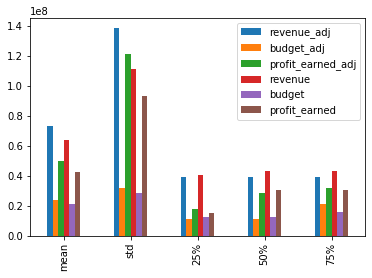

In [204]:
#  plot the relaion between ['revenue_adj','budget_adj','revenue','budget'] in describe [ mean,std ,%25 ,%50, %75]

describe[['revenue_adj','budget_adj','profit_earned_adj','revenue','budget','profit_earned']].iloc[[1,2,4,5,6]].plot.bar()

### Conclusions
- Average runtime = 102.4553471964352
- longest runtime values=900.0
- shortest runtime values = 2
- most earned revenue= 2781505847
- least earned revenue= 2
- most earned budget= 425000000
- least earned budget = 1

## - Is there a relation between a movie runtime and the vote average?

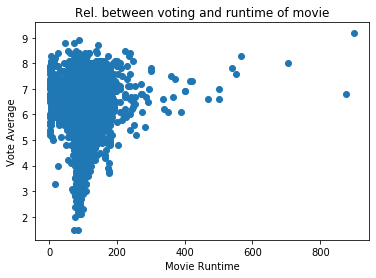

In [205]:
#Data to be plotted

runtime_data = df['runtime']
mean_vote_data = df['vote_average']

#Plotting

fig, ax = plt.subplots()

#set the plot properties
ax.set_title('Rel. between voting and runtime of movie')
ax.set_xlabel('Movie Runtime')
ax.set_ylabel('Vote Average')

ax.scatter(runtime_data, mean_vote_data);


### Conclusions
- there are a Rel. between voting and runtime of movie as most Vote Average depend on intro of movie 

## - Is the number of movies increase from year to year?

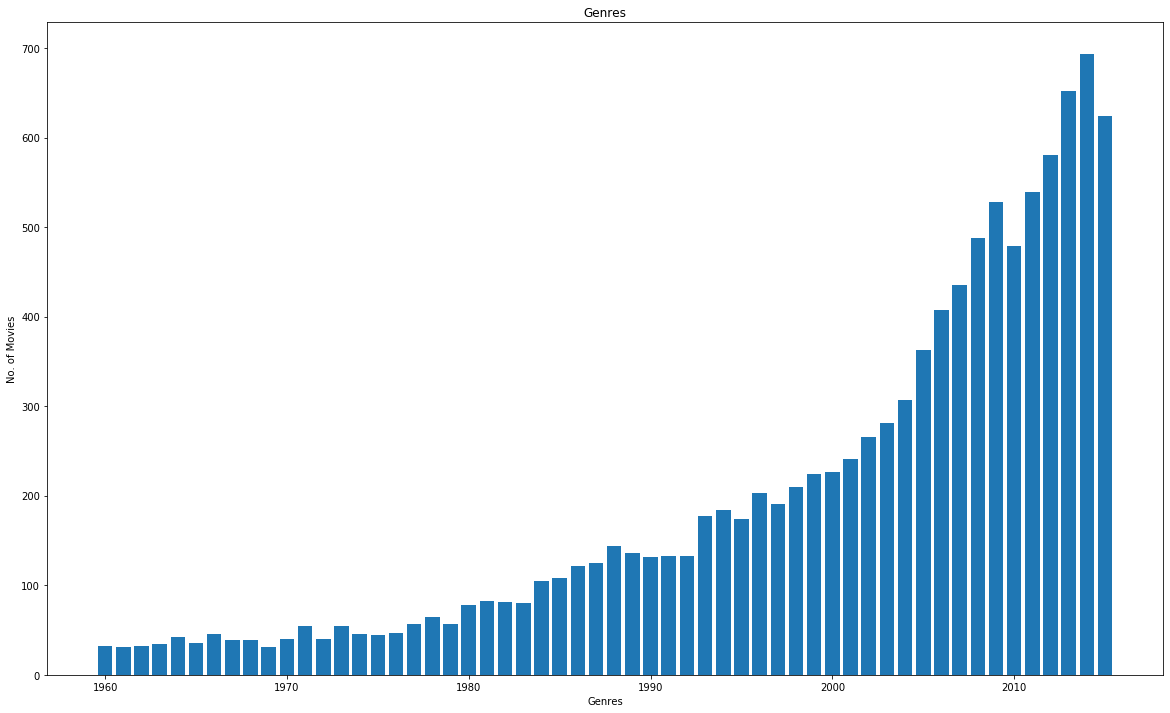

In [206]:
database_n_year=df["year"].value_counts()


#Determine the data of the X axis and the data of the X axis

x = database_n_year.index
y = database_n_year

#Plotting

fig, ax = plt.subplots()

#set the plot and ticks properties
ax.figure.set_size_inches(20, 12)
#ax.set_xticklabels(x,rotation=90)
ax.set_title("Genres")
ax.set_xlabel('Genres')
ax.set_ylabel('No. of Movies')

ax.bar(x=x, height=y);

### Conclusions
- the number of movies increase from year to year as it is 32 movies in 1960 and it becames 694 movies in 2014

## - Who are the top 5 directors according to high revenues?

In [207]:
#Data to be plotted

grouped_directors = df.groupby('director')['revenue_adj'].sum()
grouped_directors = grouped_directors.sort_values(ascending = False)[:5]

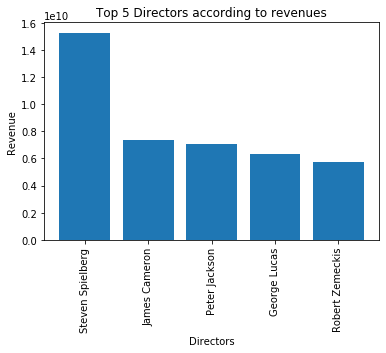

In [208]:
#Plotting

fig, ax = plt.subplots()

#set the plot and ticks properties
ax.set_xticklabels(grouped_directors.index,rotation=90)
ax.set_title("Top 5 Directors according to revenues")
ax.set_xlabel('Directors')
ax.set_ylabel('Revenue')

ax.bar(grouped_directors.index, grouped_directors);

### Conclusions
- Steven Spielberg  is the most top 5 directors according to high revenues = 15281361654
- Robert Zemeckis is the least top 5 directors according to high revenues = 5734563123

## - Is there an improvement in the quality of movies from year to year?

In [209]:
#Data to be plotted

mean_vote_data = df.groupby('year')['vote_average'].mean()
mean_budget_data = df.groupby('year')['budget_adj'].mean()

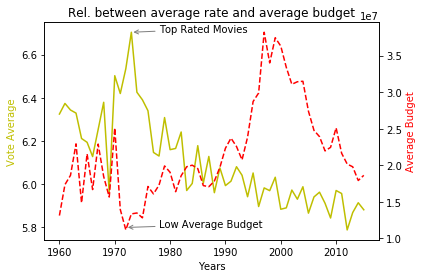

In [210]:
#Plotting

fig, ax = plt.subplots()

#Make a twin plot with shared x axis
ax2 = ax.twinx()

#set the plot properties
ax.set_xlabel('Years')
ax.set_ylabel('Vote Average',color='y')
ax2.set_ylabel('Average Budget',color='r')
ax.set_title('Rel. between average rate and average budget')

ax.annotate('Top Rated Movies',xy=(mean_vote_data.idxmax(),mean_vote_data.max()),xytext=(1978,mean_vote_data.max()),arrowprops={"arrowstyle":"->", "color":"gray"})
ax.annotate('Low Average Budget',xy=(mean_budget_data.idxmin(),5.8),xytext=(1978,5.8),arrowprops={"arrowstyle":"->", "color":"gray"})

ax2.plot(mean_budget_data.index, mean_budget_data,linestyle='--',color='red')
ax.plot(mean_vote_data.index, mean_vote_data,color='y')

### Conclusions
- there are an bad in the quality of movies from year to year 
- there are an increase in  average budget of movies from year to year

## - What kinds of properties are associated with movies that have high revenues?

In [211]:
#Sorting the data by the revenue_adj column descendingly

df.sort_values(by='revenue_adj',ascending = False,inplace=True)

#print out the first  rows of our data

df.head()

,popularity,budget,revenue,profit_earned,original_title,director,runtime,genres,vote_count,vote_average,budget_adj,revenue_adj,profit_earned_adj,year,month,day name
1386,9.432768,237000000,2781505847,2544505847,Avatar,James Cameron,162.0,Action|Adventure|Fantasy|Science Fiction,8458,7.1,240886902,2827123750,2586236848,2009,12,Thursday
1329,12.037933,11000000,775398007,764398007,Star Wars,George Lucas,121.0,Adventure|Action|Science Fiction,4428,7.9,39575591,2789712242,2750136651,1977,3,Sunday
5231,4.355219,200000000,1845034188,1645034188,Titanic,James Cameron,194.0,Drama|Romance|Thriller,4654,7.3,271692064,2506405735,2234713671,1997,11,Tuesday
10594,2.010733,8000000,441306145,433306145,The Exorcist,William Friedkin,122.0,Drama|Horror|Thriller,1113,7.2,39289276,2167324901,2128035625,1973,12,Wednesday
9806,2.563191,7000000,470654000,463654000,Jaws,Steven Spielberg,124.0,Horror|Thriller|Adventure,1415,7.3,28362748,1907005841,1878643093,1975,6,Wednesday


In [212]:
df.describe()

,popularity,budget,revenue,profit_earned,runtime,vote_count,vote_average,budget_adj,revenue_adj,profit_earned_adj,year,month
count,10800.000000,1.080000e+04,1.080000e+04,1.080000e+04,10772.000000,10800.000000,10800.000000,1.080000e+04,1.080000e+04,1.080000e+04,10800.000000,10800.000000
mean,0.649455,2.106414e+07,6.370193e+07,4.263779e+07,102.455347,218.600741,5.970880,2.349913e+07,7.342257e+07,4.992344e+07,2001.289537,6.826944
std,1.002441,2.846448e+07,1.110168e+08,9.320005e+07,30.379156,577.165055,0.933006,3.173601e+07,1.384478e+08,1.215185e+08,12.819545,3.437907
min,0.000188,1.000000e+00,2.000000e+00,-4.139124e+08,2.000000,10.000000,1.500000,0.000000e+00,2.000000e+00,-4.139124e+08,1960.000000,1.000000
25%,0.209157,1.217395e+07,4.049083e+07,1.514215e+07,90.000000,17.000000,5.400000,1.120003e+07,3.945744e+07,1.744532e+07,1995.000000,4.000000
50%,0.385471,1.217395e+07,4.288854e+07,3.071459e+07,99.000000,39.000000,6.000000,1.120003e+07,3.945744e+07,2.825741e+07,2006.000000,7.000000
75%,0.717508,1.564374e+07,4.288854e+07,3.071459e+07,112.000000,147.000000,6.600000,2.103337e+07,3.945744e+07,3.196784e+07,2011.000000,10.000000
max,32.985763,4.250000e+08,2.781506e+09,2.544506e+09,900.000000,9767.000000,9.200000,4.250000e+08,2.827124e+09,2.750137e+09,2015.000000,12.000000


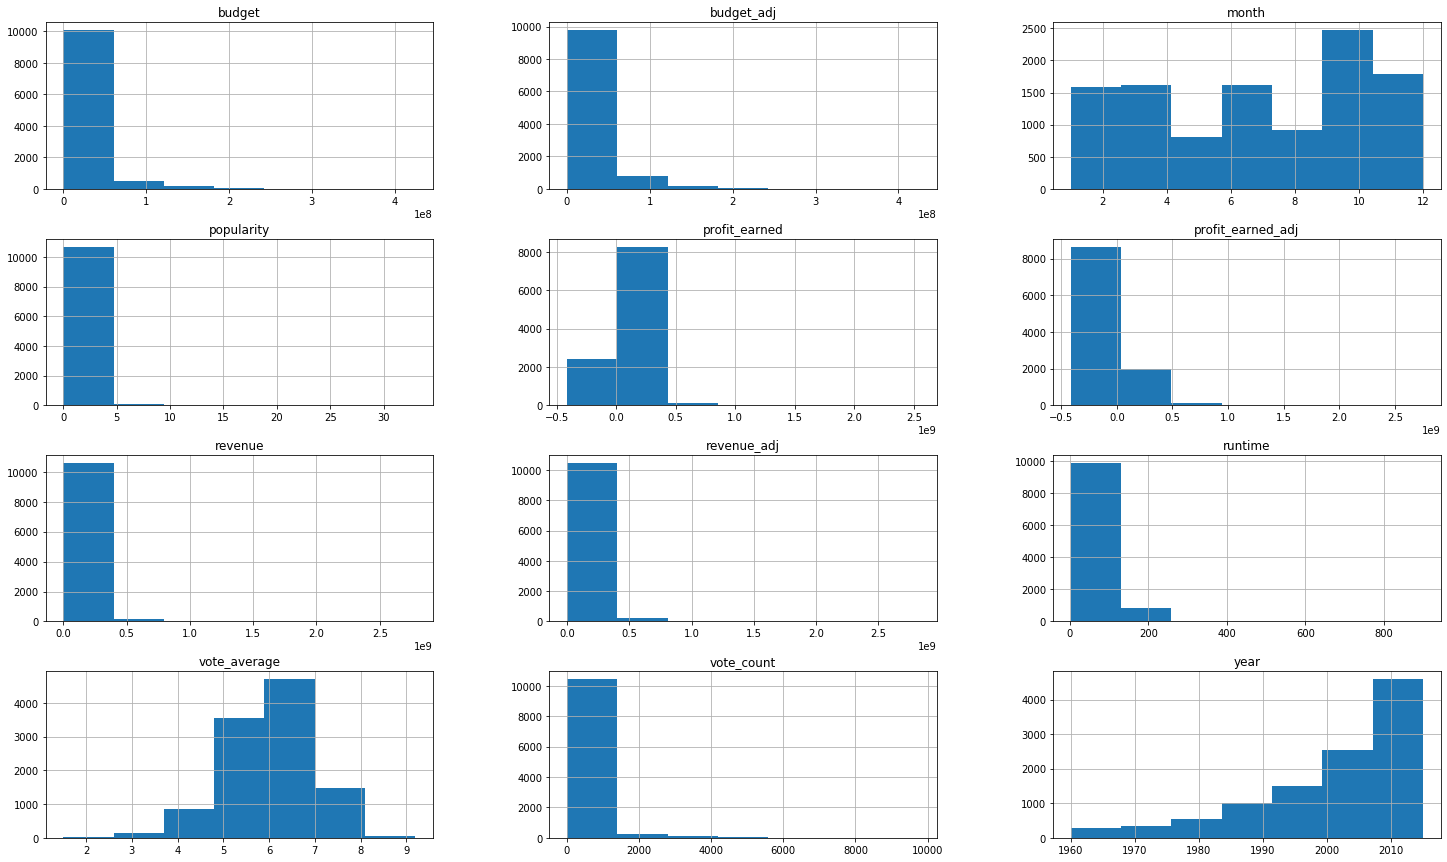

In [213]:
#Plotting a histogram for the columns in the data

df.hist(figsize = (25,15),bins=7);

## Conclusions
### Results :
- The most movie genres watched are Drama and Comedy
- As the runtime of the movie increases the voting rate of the movie increases also ( positive correlation )
- As the years go by, the budget of the movies increases but, In contrast the quality of the movies decreases
- The most director according to revenue is Steven Spielberg
- The Number of movies increases from year to year


### Limitations :
- This dataset has a lot of columns with outliers such as revenue column
- This dataset has a great number of unique values in each columns
- This datatset has a lot of unneeded colums which needs to be removed for this analysis
- This datatset has a lot of missing values which need to decide what to do with it
- The cast column and some other columns has strings and seperated with '|' character which limited our analysis until it not solved

In [214]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0